In [1]:
import pandas as pd
import webbrowser
import os
import matplotlib.pyplot as plt

from mylib import preprocessing as prep

In [3]:
# Specify csv data and processed file name for saving
str = 'test'
data_filename = str + '.csv'
data_save_filename = str + '_formatted.csv'
# Read data and do quick check
data = pd.read_csv(data_filename)
df = pd.DataFrame(data)
prep.quick_overview([df])


::: List 0 :::
dtypes
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
Number of Null in Every Column
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [4]:
# Delete all unwanted Columns
col_name = [
    'PassengerId',
    'Name',
    'Ticket',
    'Fare',
    'Cabin',
    'Embarked'
]
df = prep.delete_unwanted_columns(df, col_name)    
# prep.quick_overview(df)

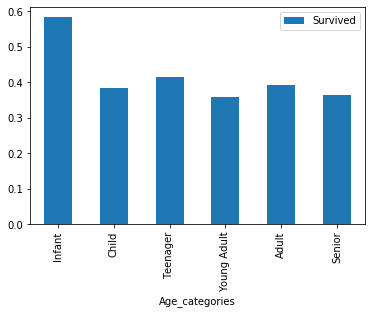

In [5]:
# Replacing age range to one label
oldCol = 'Age'
newCol = 'Age_categories'
delOldCol = True
cutRange = [-1,0, 5, 12, 18, 35, 60, 100]
dataLabel = ['Missing', 'Infant', 'Child', 'Teenager', 'Young Adult', 'Adult', 'Senior']
df.fillna(-1, inplace=True)
df = prep.replace_column_numeric(df, cutRange, dataLabel, oldCol, newCol, delOldCol)

# Plot table
age_categories_pivot = df.pivot_table(index="Age_categories",values="Survived")
age_categories_pivot.plot.bar()
plt.show()

In [ ]:
# Do further processing and save to new csv file

# one-hot encoded data
features_df = pd.get_dummies(df, columns=['Pclass', 'Sex', 'Age_categories', 'SibSp', 'Parch'])
# prep.view_on_html(features_df)
features_df = prep.delete_unwanted_columns(features_df, ['Age_categories_Missing'])  
features_df.to_csv(data_save_filename, index=False)

In [ ]:
new_data = pd.read_csv(data_save_filename)
prep.view_on_html(new_data)